In [57]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense,Flatten, Dropout,BatchNormalization, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.optimizers import Adam 
import pandas as pd
import cv2 as cv2
import numpy as np 
from matplotlib import pyplot as plt 
import os 
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [3]:
dataset = r"C:\Users\R1007398\Downloads\Books_AIML\Innomatics\CV\CNN\Codes\Datasets\Brain_scan_dataset\brain_tumor_dataset"
Yes_path = r"C:\Users\R1007398\Downloads\Books_AIML\Innomatics\CV\CNN\Codes\Datasets\Brain_scan_dataset\brain_tumor_dataset\yes"
No_path = r"C:\Users\R1007398\Downloads\Books_AIML\Innomatics\CV\CNN\Codes\Datasets\Brain_scan_dataset\brain_tumor_dataset\no"

(519, 456, 3)


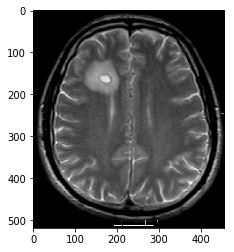

In [25]:
img = cv2.imread(Yes_path+'\Y3.jpg')
print(img.shape)
plt.imshow(img)

In [6]:
vals = [Yes_path, No_path]
print(os.listdir(vals[0]).__len__())
print(os.listdir(vals[1]).__len__())

155
98


In [7]:
pathdir = [Yes_path, No_path]
classes = ['Yes', 'No']
filepaths = []
labels = []
for i, j in zip(pathdir, classes):
    filelist = os.listdir(i)
    print(filelist)
    for vals in filelist:
        x = os.path.join(i, vals)
        filepaths.append(x)
        labels.append(j)
print(filepaths.__len__(), labels.__len__())


['Y1.jpg', 'Y10.jpg', 'Y100.JPG', 'Y101.jpg', 'Y102.jpg', 'Y103.jpg', 'Y104.jpg', 'Y105.jpg', 'Y106.jpg', 'Y107.jpg', 'Y108.jpg', 'Y109.JPG', 'Y11.jpg', 'Y111.JPG', 'Y112.JPG', 'Y113.JPG', 'Y114.JPG', 'Y115.JPG', 'Y116.JPG', 'Y117.JPG', 'Y12.jpg', 'Y120.JPG', 'Y13.jpg', 'Y14.jpg', 'Y146.JPG', 'Y147.JPG', 'Y148.JPG', 'Y15.jpg', 'Y153.jpg', 'Y154.jpg', 'Y155.JPG', 'Y156.JPG', 'Y157.JPG', 'Y158.JPG', 'Y159.JPG', 'Y16.JPG', 'Y160.JPG', 'Y161.JPG', 'Y162.jpg', 'Y163.JPG', 'Y164.JPG', 'Y165.JPG', 'Y166.JPG', 'Y167.JPG', 'Y168.jpg', 'Y169.jpg', 'Y17.jpg', 'Y170.JPG', 'Y18.JPG', 'Y180.jpg', 'Y181.jpg', 'Y182.JPG', 'Y183.jpg', 'Y184.JPG', 'Y185.jpg', 'Y186.jpg', 'Y187.jpg', 'Y188.jpg', 'Y19.JPG', 'Y192.JPG', 'Y193.JPG', 'Y194.jpg', 'Y195.JPG', 'Y2.jpg', 'Y20.jpg', 'Y21.jpg', 'Y22.jpg', 'Y23.JPG', 'Y24.jpg', 'Y242.JPG', 'Y243.JPG', 'Y244.JPG', 'Y245.jpg', 'Y246.JPG', 'Y247.JPG', 'Y248.JPG', 'Y249.JPG', 'Y25.jpg', 'Y250.jpg', 'Y251.JPG', 'Y252.jpg', 'Y253.JPG', 'Y254.jpg', 'Y255.JPG', 'Y256.JPG',

In [12]:
print(filepaths[0:4])
print(labels[0:4])

print(filepaths[-4:])
print(labels[-4:])


['C:\\Users\\R1007398\\Downloads\\Books_AIML\\Innomatics\\CV\\CNN\\Codes\\Datasets\\Brain_scan_dataset\\brain_tumor_dataset\\yes\\Y1.jpg', 'C:\\Users\\R1007398\\Downloads\\Books_AIML\\Innomatics\\CV\\CNN\\Codes\\Datasets\\Brain_scan_dataset\\brain_tumor_dataset\\yes\\Y10.jpg', 'C:\\Users\\R1007398\\Downloads\\Books_AIML\\Innomatics\\CV\\CNN\\Codes\\Datasets\\Brain_scan_dataset\\brain_tumor_dataset\\yes\\Y100.JPG', 'C:\\Users\\R1007398\\Downloads\\Books_AIML\\Innomatics\\CV\\CNN\\Codes\\Datasets\\Brain_scan_dataset\\brain_tumor_dataset\\yes\\Y101.jpg']
['Yes', 'Yes', 'Yes', 'Yes']
['C:\\Users\\R1007398\\Downloads\\Books_AIML\\Innomatics\\CV\\CNN\\Codes\\Datasets\\Brain_scan_dataset\\brain_tumor_dataset\\no\\No19.jpg', 'C:\\Users\\R1007398\\Downloads\\Books_AIML\\Innomatics\\CV\\CNN\\Codes\\Datasets\\Brain_scan_dataset\\brain_tumor_dataset\\no\\No20.jpg', 'C:\\Users\\R1007398\\Downloads\\Books_AIML\\Innomatics\\CV\\CNN\\Codes\\Datasets\\Brain_scan_dataset\\brain_tumor_dataset\\no\\No21.j

In [13]:
dataset = list(zip(filepaths, labels))
pathframe = pd.DataFrame(dataset, columns=['filepaths', 'labels'])

In [17]:
pathframe.__len__()
pathframe.tail()

,filepaths,labels
248,C:\Users\R1007398\Downloads\Books_AIML\Innomat...,No
249,C:\Users\R1007398\Downloads\Books_AIML\Innomat...,No
250,C:\Users\R1007398\Downloads\Books_AIML\Innomat...,No
251,C:\Users\R1007398\Downloads\Books_AIML\Innomat...,No
252,C:\Users\R1007398\Downloads\Books_AIML\Innomat...,No


In [19]:
print(pathframe['labels'].value_counts())

Yes    155
No      98
Name: labels, dtype: int64


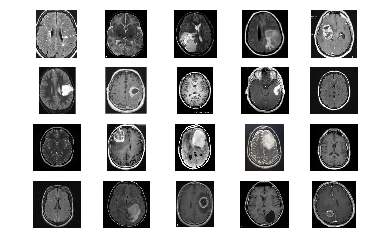

In [22]:
for i in range(0, 20):
    vals = np.random.randint(1, len(pathframe))
    plt.subplot(4,5, i+1)
    plt.imshow(cv2.imread(pathframe.filepaths[vals]))
    plt.axis('off')
plt.show()

In [23]:
Train, Test = train_test_split(pathframe, train_size=0.90, random_state=0)
Train_new, valid = train_test_split(Train, train_size = 0.90, random_state=0)
print(Train.shape, Test.shape, Train_new.shape, valid.shape)

(227, 2) (26, 2) (204, 2) (23, 2)


C:\Users\R1007398\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


#Preprocessing the dataset

In [68]:
train_datagen = ImageDataGenerator(rescale=1.0/255, rotation_range= 40 , width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                  zoom_range=0.2, horizontal_flip = True, vertical_flip= True)
test_datagen = ImageDataGenerator(rescale=1.0/255)

In [69]:
train_gen = train_datagen.flow_from_dataframe(dataframe = Train_new, x_col = 'filepaths', y_col='labels', batch_size=16, 
                                             target_size=(150,150), class_mode = 'binary', shuffle=True)

valid_gen = train_datagen.flow_from_dataframe(dataframe = valid, x_col = 'filepaths', y_col='labels', batch_size=16, 
                                             target_size=(150,150), class_mode = 'binary', shuffle=True)
test_gen = train_datagen.flow_from_dataframe(dataframe = Test, x_col = 'filepaths', y_col='labels', batch_size=16, 
                                             target_size=(150,150), class_mode = 'binary', shuffle=False)

Found 204 validated image filenames belonging to 2 classes.
Found 23 validated image filenames belonging to 2 classes.
Found 26 validated image filenames belonging to 2 classes.


{'No': 0, 'Yes': 1}
(16, 200, 200, 3)


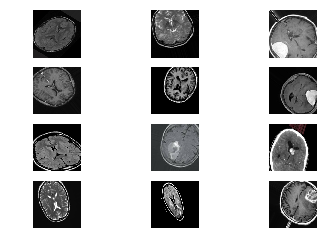

In [67]:
print(train_gen.class_indices)
print(train_gen[0][0].shape)

for i in range(0, 12):
    val = train_gen[0][0][i]
    vals = val.astype('uint8')
    plt.subplot(4,3,i+1)
    plt.imshow(vals)
    plt.axis('off')
plt.show()

In [53]:
base_model = tf.keras.applications.InceptionResNetV2(weights='imagenet', input_shape= (150,150,3), include_top=False)
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))


In [59]:
callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience = 2, min_delta= 0.01)

In [61]:
model.compile(loss='binary_crossentropy', optimizer= Adam(lr=0.01), metrics=['accuracy'])
model.fit(train_gen, validation_data= valid_gen, epochs=30, verbose=1)

Epoch 1/30
13/13 [==============================] - 76s 4s/step - loss: 0.6864 - accuracy: 0.6765 - val_loss: 587476828021587968.0000 - val_accuracy: 0.4348
Epoch 2/30
13/13 [==============================] - 54s 4s/step - loss: 0.5799 - accuracy: 0.7206 - val_loss: 4336725786624.0000 - val_accuracy: 0.4348
Epoch 3/30
13/13 [==============================] - 54s 4s/step - loss: 0.6013 - accuracy: 0.7304 - val_loss: 41471482789888.0000 - val_accuracy: 0.4348
Epoch 4/30
13/13 [==============================] - 53s 4s/step - loss: 0.7129 - accuracy: 0.6471 - val_loss: 74515218432.0000 - val_accuracy: 0.4348
Epoch 5/30
13/13 [==============================] - 57s 4s/step - loss: 0.5529 - accuracy: 0.7108 - val_loss: 17511294976.0000 - val_accuracy: 0.4348
Epoch 6/30
13/13 [==============================] - 53s 4s/step - loss: 0.6376 - accuracy: 0.6716 - val_loss: 58281496.0000 - val_accuracy: 0.4348
Epoch 7/30
13/13 [==============================] - 55s 4s/step - loss: 0.6849 - accuracy: 

In [55]:
model.evaluate(test_gen)

2/2 [==============================] - 2s 661ms/step - loss: 7.3800 - accuracy: 0.4615


[7.380009651184082, 0.4615384638309479]